# Decision Trees

## Training and Visualizing a Decision Tree

In [1]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier

iris = load_iris()
X = iris.data[:, 2:] # petal length and width
y = iris.target
tree_clf = DecisionTreeClassifier(max_depth=2)
tree_clf.fit(X, y)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=2, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [2]:
from sklearn.tree import export_graphviz

export_graphviz(
    tree_clf,
    out_file='./iris_tree.dot',
    feature_names=iris.feature_names[2:],
    class_names=iris.target_names,
    rounded=True,
    filled=True
)

<img src='etc/first_tree_graph.jpg' width=420><img/>

## Making Predictions

## Estimating Class Probabilities

In [3]:
tree_clf.predict_proba([[5, 1.5]])

array([[0.        , 0.90740741, 0.09259259]])

In [4]:
tree_clf.predict([[5, 1.5]])

array([1])

## Regression

In [5]:
from sklearn.tree import DecisionTreeRegressor
tree_reg = DecisionTreeRegressor(max_depth=2)
tree_reg.fit(X, y)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=2,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

* <img src='etc/tree_regressor.jpg' width='420'/>
* This tree looks very similar to the classification tree you built earlier. The main difference is that instead of predicting a class in each node, it predicts a value.

1. Train and fine-tune a Decision Tree for the moons dataset.
* a. Generate a moons dataset using make_moons(n_samples=10000, noise=0.4).
* b. Split it into a training set and a test set using train_test_split().
Exercises | 189
* c. Use grid search with cross-validation (with the help of the GridSearchCV
class) to find good hyperparameter values for a DecisionTreeClassifier.
Hint: try various values for max_leaf_nodes.
* d. Train it on the full training set using these hyperparameters, and measure
your model’s performance on the test set. You should get roughly 85% to 87%
accuracy.

In [6]:
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV

In [7]:
# a. Generate a moons dataset using make_moons(n_samples=10000, noise=0.4).
X, y = make_moons(n_samples=10000, noise=0.1, random_state=99)

In [8]:
# b. Split it into a training set...
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=99)

In [9]:
print(X_test.shape)
print(y_test.shape)

(2000, 2)
(2000,)


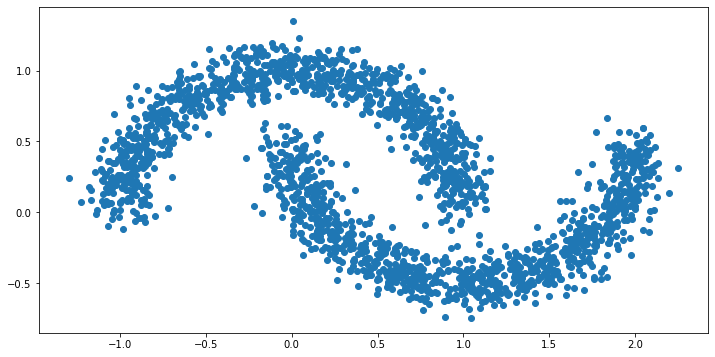

In [10]:
plt.figure(figsize=(12, 6))
plt.scatter(x=X_test[:, 0], y=X_test[:, 1])
plt.show()

In [11]:
parameters = {
    'max_leaf_nodes': [5, 10, 20],
    'max_depth': [3, 5, 10]
}
tree_clf = DecisionTreeClassifier() 
clf = GridSearchCV(tree_clf, parameters)
clf.fit(X_train, y_train)

GridSearchCV(cv=None, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=None,
                                              splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'max_depth': [3, 5, 10],
                         

In [12]:
clf.best_params_

{'max_depth': 10, 'max_leaf_nodes': 20}

In [13]:
clf.cv_results_["mean_test_score"]

array([0.9105  , 0.9105  , 0.9105  , 0.901   , 0.992   , 0.99175 ,
       0.901   , 0.992   , 0.997875])

2. Grow a forest.
* a. Continuing the previous exercise, generate 1,000 subsets of the training set,
each containing 100 instances selected randomly. Hint: you can use ScikitLearn’s ShuffleSplit class for this.
* b. Train one Decision Tree on each subset, using the best hyperparameter values
found above. Evaluate these 1,000 Decision Trees on the test set. Since they
were trained on smaller sets, these Decision Trees will likely perform worse
than the first Decision Tree, achieving only about 80% accuracy.
* c. Now comes the magic. For each test set instance, generate the predictions of
the 1,000 Decision Trees, and keep only the most frequent prediction (you can
use SciPy’s mode() function for this). This gives you majority-vote predictions
over the test set.
* d. Evaluate these predictions on the test set: you should obtain a slightly higher
accuracy than your first model (about 0.5 to 1.5% higher). Congratulations,
you have trained a Random Forest classifier!


In [14]:
from sklearn.model_selection import ShuffleSplit
import numpy as np

In [15]:
X, y = make_moons(n_samples=10000, noise=0.1, random_state=99)

In [16]:
X

array([[ 1.15679099, -0.44574429],
       [ 1.14601925, -0.4872403 ],
       [-0.5047825 ,  0.80213104],
       ...,
       [ 1.7762421 ,  0.40310877],
       [-0.35079335,  0.96162579],
       [ 1.00939573, -0.31788436]])

In [17]:
set_size = 100
Xs = dict()
ys = dict()
for i in range(int(np.floor(len(X) / set_size))):
    Xs[i] = X[(i * set_size):((i + 1) * set_size)]
    ys[i] = y[(i * set_size):((i + 1) * set_size)]

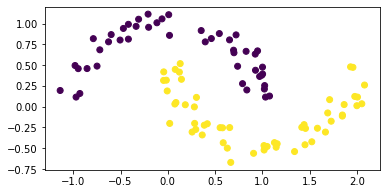

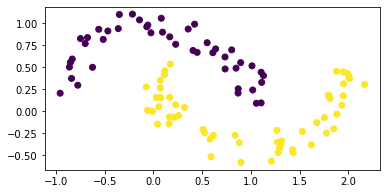

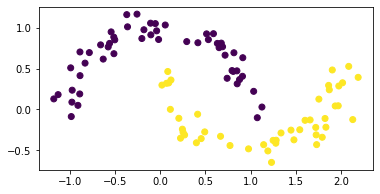

In [18]:
for i in range(3):
    plt.figure(figsize=(6, 3))
    plt.scatter(Xs[i][:, 0], Xs[i][:, 1], c=ys[i])
    plt.show()

In [19]:
parameters = {
    'max_leaf_nodes': [5, 10, 20, 30, 50],
    'max_depth': [3, 5, 10, 15, 20]
}
tree_clf = DecisionTreeClassifier() 
clf = GridSearchCV(tree_clf, parameters)
clf.fit(X, y)
clf.best_params_

{'max_depth': 10, 'max_leaf_nodes': 50}

In [20]:
models = []

for i in Xs.keys():
    model = DecisionTreeClassifier(max_depth=10, max_leaf_nodes=30)
    model.fit(Xs[i], ys[i])
    models.append(model)

In [21]:
models[:5]

[DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                        max_depth=10, max_features=None, max_leaf_nodes=30,
                        min_impurity_decrease=0.0, min_impurity_split=None,
                        min_samples_leaf=1, min_samples_split=2,
                        min_weight_fraction_leaf=0.0, presort='deprecated',
                        random_state=None, splitter='best'),
 DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                        max_depth=10, max_features=None, max_leaf_nodes=30,
                        min_impurity_decrease=0.0, min_impurity_split=None,
                        min_samples_leaf=1, min_samples_split=2,
                        min_weight_fraction_leaf=0.0, presort='deprecated',
                        random_state=None, splitter='best'),
 DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                        max_depth=10, max_features=None, max_lea

In [22]:
X_test, y_test = make_moons(n_samples=2000, noise=0.1, random_state=99)

In [23]:
from sklearn.metrics import accuracy_score

In [24]:
model = models[0]

predictions = model.predict(X_test)
accuracy_score(y_test, predictions)

0.926

In [25]:
accuracy_list = []

for model in models:
    predictions = model.predict(X_test)
    accuracy = accuracy_score(y_test, predictions)
    accuracy_list.append(accuracy)

In [26]:
np.mean(accuracy_list)

0.95542

In [27]:
def hard_vote(models, X_test):
    predictions_list = []
    for model in models:
        predictions = model.predict(X_test)
        predictions_list.append(predictions)

    np_predictions_list = np.array(predictions_list).T

    new_predictions = []
    model_count = len(np_predictions_list[0])
    print('# of models is', model_count)
    for predictions in np_predictions_list:
        if sum(predictions) > (model_count / 2):
            new_predictions.append(1)
        else:
            new_predictions.append(0)
    
    return new_predictions


In [28]:
voted_predictions = hard_vote(models, X_test)

# of models is 100


In [29]:
accuracy_score(y_test, voted_predictions)

0.988

* 0.95542 was our average accuracy.
* 0.988 is our hard_voted accuracy.
* It's an improvement :)